kaggle 

https://www.kaggle.com/anmolkumar/house-price-prediction-challenge?select=test.csv

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/dataset/train.csv.zip")
print(df.shape)

(29451, 12)


In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [ ]:
df.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [ ]:
#no tiene valores nullos
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

Rename the columns

In [ ]:
df = df.rename(columns={'BHK_NO.': 'NUMBER_OF_ROOMS', 'BHK_OR_RK': 'TYPE_OF_PROPETY', "TARGET(PRICE_IN_LACS)": "TARGET"})
df["SQUARE_METERES"] = df.SQUARE_FT/10.764
df = df.drop(columns=["SQUARE_FT"])

In [ ]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUMBER_OF_ROOMS,TYPE_OF_PROPETY,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET,SQUARE_METERES
0,Owner,0,0,2,BHK,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0,120.794910
1,Dealer,0,0,2,BHK,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0,118.450390
2,Owner,0,0,2,BHK,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0,86.692653
3,Owner,0,1,2,BHK,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5,86.391782
4,Dealer,1,0,2,BHK,0,1,"New Town,Kolkata",22.592200,88.484911,60.5,92.810224


EDA

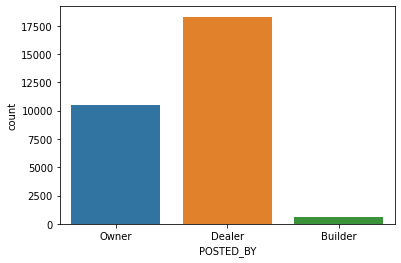

In [ ]:
import seaborn as sns
sns.countplot(x="POSTED_BY", data = df )

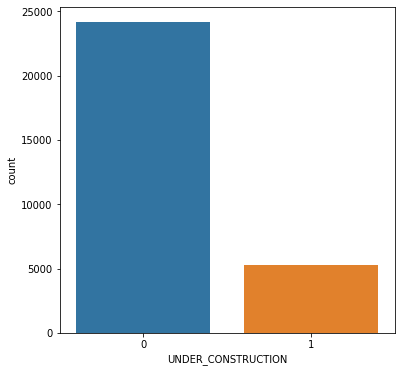

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(6,6)
sns.countplot(x= "UNDER_CONSTRUCTION", data = df)

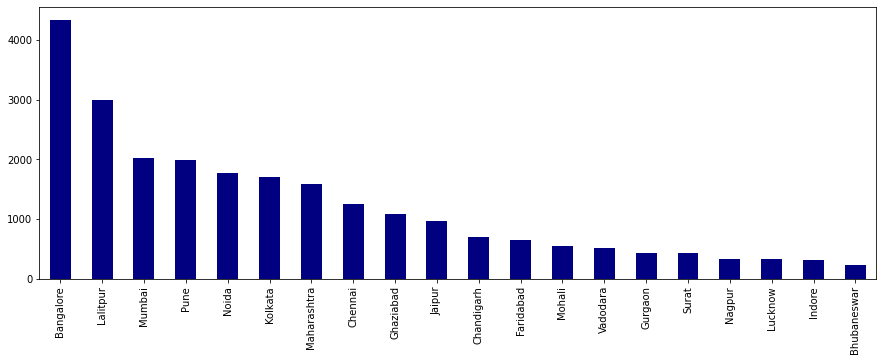

In [ ]:
plt.figure(figsize=(15,5))
df.ADDRESS = df.ADDRESS.apply(lambda x: x.split(',')[-1])
df.ADDRESS.value_counts()[:20].plot(kind='bar',color='navy')
plt.show()

5      190
4     1723
1     3574
3    10546
2    13324
Name: NUMBER_OF_ROOMS, dtype: int64


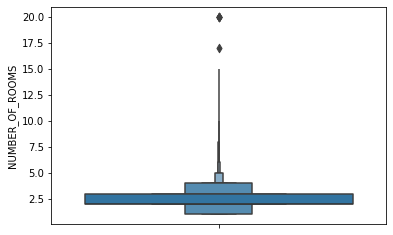

In [ ]:
# tenemos outliers
print(df["NUMBER_OF_ROOMS"].value_counts()[:5].sort_values(ascending=True))
sns.boxenplot(y = df["NUMBER_OF_ROOMS"])

In [ ]:
#quitamos los outliers
df = df[df.NUMBER_OF_ROOMS < 9]

In [ ]:
df.dtypes

POSTED_BY              object
UNDER_CONSTRUCTION      int64
RERA                    int64
NUMBER_OF_ROOMS         int64
TYPE_OF_PROPETY        object
READY_TO_MOVE           int64
RESALE                  int64
ADDRESS                object
LONGITUDE             float64
LATITUDE              float64
TARGET                float64
SQUARE_METERES        float64
dtype: object

In [ ]:
# aqui vemos los coeficientes de correlacion
#que nos indican que tanto estan relacionados una variable con respecto a la otra
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,UNDER_CONSTRUCTION,RERA,NUMBER_OF_ROOMS,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET,SQUARE_METERES
UNDER_CONSTRUCTION,1.000000,0.363948,-0.042731,-1.000000,-0.347499,0.006537,-0.000345,0.055498,-0.004205
RERA,0.363948,1.000000,0.016834,-0.363948,-0.270269,0.104710,-0.065036,0.067831,-0.006233
NUMBER_OF_ROOMS,-0.042731,0.016834,1.000000,0.042731,0.012953,0.080219,0.048627,0.115882,0.005736
READY_TO_MOVE,-1.000000,-0.363948,0.042731,1.000000,0.347499,-0.006537,0.000345,-0.055498,0.004205
RESALE,-0.347499,-0.270269,0.012953,0.347499,1.000000,0.024180,0.014811,-0.207491,0.001733
LONGITUDE,0.006537,0.104710,0.080219,-0.006537,0.024180,1.000000,-0.155071,-0.030946,-0.012598
LATITUDE,-0.000345,-0.065036,0.048627,0.000345,0.014811,-0.155071,1.000000,-0.017335,0.000804
TARGET,0.055498,0.067831,0.115882,-0.055498,-0.207491,-0.030946,-0.017335,1.000000,0.402761
SQUARE_METERES,-0.004205,-0.006233,0.005736,0.004205,0.001733,-0.012598,0.000804,0.402761,1.000000


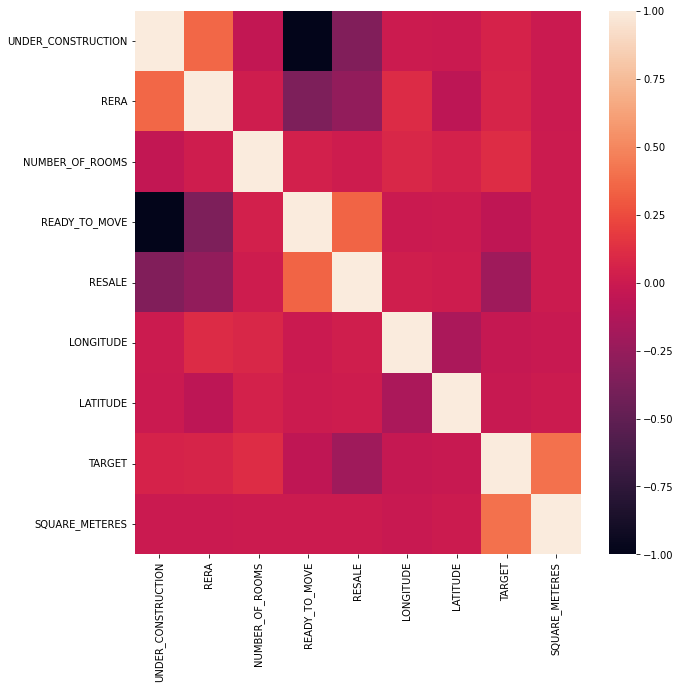

In [ ]:
plt.figure(figsize= (10, 10))
sns.heatmap(corr)

eliminamos las columnas que no nos interesan

In [ ]:
#considero que la latitud y longitud no nos aportan gran valor al dataset asi que las eliminare
df = df.drop(columns= ["LONGITUDE", "LATITUDE", "ADDRESS"])
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,NUMBER_OF_ROOMS,TYPE_OF_PROPETY,READY_TO_MOVE,RESALE,TARGET,SQUARE_METERES
0,Owner,0,0,2,BHK,1,1,55.0,120.794910
1,Dealer,0,0,2,BHK,1,1,51.0,118.450390
2,Owner,0,0,2,BHK,1,1,43.0,86.692653
3,Owner,0,1,2,BHK,1,1,62.5,86.391782
4,Dealer,1,0,2,BHK,0,1,60.5,92.810224


In [ ]:
#esto sirve para que las variables categoricas se conviertan en numeros
df = pd.get_dummies(df, columns=['POSTED_BY', 'TYPE_OF_PROPETY'])# "ADDRESS" 
df = df.astype("float32")

In [ ]:
df.head()

,UNDER_CONSTRUCTION,RERA,NUMBER_OF_ROOMS,READY_TO_MOVE,RESALE,TARGET,SQUARE_METERES,POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner,TYPE_OF_PROPETY_BHK,TYPE_OF_PROPETY_RK
0,0.0,0.0,2.0,1.0,1.0,55.0,120.794907,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,2.0,1.0,1.0,51.0,118.450394,0.0,1.0,0.0,1.0,0.0
2,0.0,0.0,2.0,1.0,1.0,43.0,86.692650,0.0,0.0,1.0,1.0,0.0
3,0.0,1.0,2.0,1.0,1.0,62.5,86.391785,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,2.0,0.0,1.0,60.5,92.810226,0.0,1.0,0.0,1.0,0.0


model

In [ ]:
x = df.drop(columns= ["TARGET"]).values
y = df["TARGET"].values
x.astype("float32")
y.reshape(-1,1).astype("float32")
print("el shape de x es de: ", x.shape)
print("el shape de y es de: ", y.shape)

el shape de x es de:  (29430, 11)
el shape de y es de:  (29430,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print("esta es la cantidad de x para entrenamiento: ", len(X_train))
print("esta es la cantidad de y para entrenamiento: ", len(y_train))
print("esta es la cantidad de x para prueba: ", len(X_test))
print("esta es la cantidad de y para prueba: ", len(y_test))

esta es la cantidad de x para entrenamiento:  23544
esta es la cantidad de y para entrenamiento:  23544
esta es la cantidad de x para prueba:  5886
esta es la cantidad de y para prueba:  5886


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train,y_train)
print(dtr.score(X_train, y_train))

0.9949063535975661


In [ ]:
import numpy as np
y_pred =dtr.predict(X_test)
y_pred = np.array(y_pred).astype("float32")
print("esta es el resultado de las primeras 10 predicciones: ", y_pred[:10])
print("esta es el resultado de las primeras 10 verdaderas: ", y_test[:10])


esta es el resultado de las primeras 10 predicciones:  [  9.5       49.       850.        34.        25.       110.
  80.3625   190.        25.777779  45.3     ]
esta es el resultado de las primeras 10 verdaderas:  [  9.5  32.8 100.   29.   65.2  66.   40.8 190.   16.   45.3]
